In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
connection = sqlite3.connect("../../big_files/database.sqlite")
crsr = connection.cursor()

In [3]:
df = pd.DataFrame()

In [4]:
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

In [5]:
query_match = '''SELECT * FROM Match'''
query_team = '''SELECT * FROM Team'''
query_country = '''SELECT * FROM Country'''
query_team_attributes = '''SELECT * FROM Team_Attributes'''

In [6]:
match_df = sql_query(query_match)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
team_df = sql_query(query_team)
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
country_df = sql_query(query_country)
country_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [9]:
team_attributes_df = sql_query(query_team_attributes)
team_attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [10]:
df['season'] = match_df['season']

In [11]:
df['home_team_name'] = match_df['home_team_api_id'].apply(lambda x: (sql_query(("SELECT team_short_name FROM Team WHERE team_api_id IS " + str(x)))).values[0][0])
df['away_team_name'] = match_df['away_team_api_id'].apply(lambda x: (sql_query(("SELECT team_short_name FROM Team WHERE team_api_id IS " + str(x)))).values[0][0])

In [12]:
df['country'] = match_df['country_id'].apply(lambda x: (sql_query(("SELECT name FROM Country WHERE id IS " + str(x)))).values[0][0])

In [13]:
# df['home_team_buildUpPlaySpeed'] = match_df['home_team_api_id'].apply(lambda x: (sql_query(("SELECT buildUpPlaySpeed FROM Team_Attributes WHERE team_api_id IS " + str(x)))).values)

In [14]:
# df['lenght_home_team_buildup'] = df['home_team_buildUpPlaySpeed'].apply(lambda x: (len(x)))

In [15]:
# df.loc[df["lenght_home_team_buildup"] == 0, "home_team_buildUpPlaySpeed"] = None

In [16]:
# import numpy as np

# mask = df['lenght_home_team_buildup'] != 0
# df_valid = df[mask]

# df_valid.loc[mask, 'home_team_buildUpPlaySpeed'] = df['home_team_buildUpPlaySpeed']
# df_valid['home_team_buildUpPlaySpeed'] = df_valid['home_team_buildUpPlaySpeed'].apply(lambda x: x[-1][0])

In [17]:
# df_valid.head()

In [18]:
df.head()

,season,home_team_name,away_team_name,country
0,2008/2009,GEN,BAC,Belgium
1,2008/2009,ZUL,LOK,Belgium
2,2008/2009,CEB,AND,Belgium
3,2008/2009,GEN,MON,Belgium
4,2008/2009,DEN,STL,Belgium


In [19]:
# 0 = empatan
# 1 = gana home
# 2 = gana away

In [20]:
df['result'] = None

In [21]:
df['result'] = np.where(match_df['home_team_goal'] == match_df['away_team_goal'], 0, df['result'])
df['result'] = np.where(match_df['home_team_goal'] > match_df['away_team_goal'], 1, df['result'])
df['result'] = np.where(match_df['home_team_goal'] < match_df['away_team_goal'], 2, df['result'])

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df.head()

,season,home_team_name,away_team_name,country,result
0,2008/2009,GEN,BAC,Belgium,0
1,2008/2009,ZUL,LOK,Belgium,0
2,2008/2009,CEB,AND,Belgium,2
3,2008/2009,GEN,MON,Belgium,1
4,2008/2009,DEN,STL,Belgium,2


In [24]:
df.to_sql(name='prediction', con=connection, index=False)
connection.close()

In [19]:
df["result"] = pd.to_numeric(df["result"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          25979 non-null  object
 1   home_team_name  25979 non-null  object
 2   away_team_name  25979 non-null  object
 3   country         25979 non-null  object
 4   result          25979 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1014.9+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le_season = LabelEncoder()
le_season.fit(df['season'])
df['season'] = le_season.transform(df['season'])

In [23]:
le_home_team_name = LabelEncoder()
le_home_team_name.fit(df['home_team_name'])
df['home_team_name'] = le_home_team_name.transform(df['home_team_name'])

In [24]:
le_away_team_name = LabelEncoder()
le_away_team_name.fit(df['away_team_name'])
df['away_team_name'] = le_away_team_name.transform(df['away_team_name'])

In [25]:
le_country = LabelEncoder()
le_country.fit(df['country'])
df['country'] = le_country.transform(df['country'])

<AxesSubplot:>

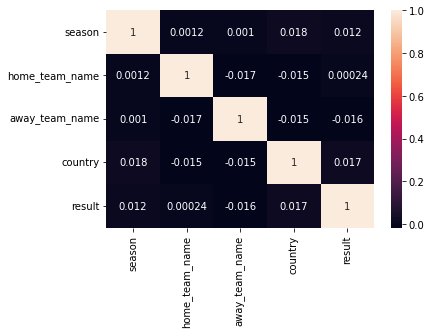

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
X = df.drop('result', axis=1)
y = df['result']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model_test = RandomForestClassifier(random_state=42)
model_test.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model_test.predict(X_test)

In [32]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("SCORE IN TEST: ", model_test.score(X_test, y_test))
print("SCORE IN TRAIN: ", model_test.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.44091608929946113
RECALL OF THE MODEL:  0.39688226740413485
SCORE IN TEST:  0.44091608929946113
SCORE IN TRAIN:  0.9572246547659145


In [33]:
model_accuracy = metrics.accuracy_score(y_test, y_pred)

In [34]:
accuracy_dict = {'accuracy_0' : model_accuracy}

In [35]:
import json

In [37]:
with open ('accuracy_monitor.json', 'w') as f:
    json.dump(accuracy_dict, f)

In [82]:
import pickle

In [83]:
filename = 'model_random'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
path = filename
with open(path, 'wb') as archivo_salida:
    pickle.dump(model_test, archivo_salida)

In [84]:
filename = 'le_season'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
path = filename
with open(path, 'wb') as archivo_salida:
    pickle.dump(le_season, archivo_salida)

In [85]:
filename = 'le_home_team_name'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
path = filename
with open(path, 'wb') as archivo_salida:
    pickle.dump(le_home_team_name, archivo_salida)

In [86]:
filename = 'le_away_team_name'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
path = filename
with open(path, 'wb') as archivo_salida:
    pickle.dump(le_away_team_name, archivo_salida)

In [87]:
filename = 'le_country'
# date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# name = filename + date
path = filename
with open(path, 'wb') as archivo_salida:
    pickle.dump(le_country, archivo_salida)

In [40]:
match_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24